<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Exploració: Grafs, DFS, BFS, Dijkstra</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from matplotlib import pyplot as plt
import networkx as nx
from maze import *

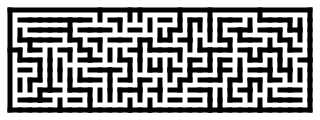

In [2]:
# Creem un laberint amb X cel·les horitzontals i Y cel.les verticals i el mostrem.
# Observeu que hem definit un 'seed'. Això vol dir que, tot i que el laberint es genera de forma aleatòria,
# tindreu tots el mateix.
maze = Maze(30, 10, seed=15)
maze.display_maze(height=100)

La longitud del camí mínim és 45


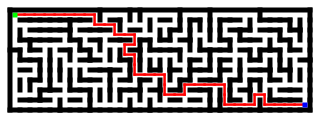

In [3]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

# La llibreria networX ja té una funció per trobar el camí mínim
A = 0                              # Node orígen (Verd) 
B = len(G.nodes)-1                 # Node destí  (Blau)
pth = nx.shortest_path(G, A, B)
print('La longitud del camí mínim és',len(pth))

# Afegim aquest camí al nostre laberint
maze.set_path(pth)

# Mostrem el resultat
maze.display_maze(plot_path=True, height=100)

In [4]:
# !pip install --upgrade networkx

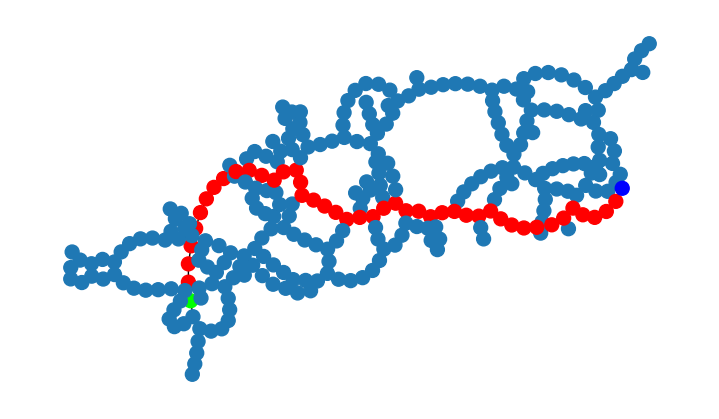

In [6]:
# Mostrem el laberint com un graf.
plt.figure(figsize=(7,4))

# Definim el color dels nodes.
# Si el node és el punt A (inici) el pintem verd, si es el node B (final) el pintem blau, si es un node del camí, vermell i finalment
# deixem el color per defecte de networkx per a la resta de nodes.

colorA, colorB, colorPTH, colorDEF = '#00ff00', '#0000ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorPTH if n in pth else colorDEF for n in G.nodes]

# Existeixen moltes formes diferents de dibuixar els graphs. La Kamada-Kawai ens permet veure el graf com un 'graf de força'.
# Aquests tipus de visualitzacions intenten que les arestes no se superposin.
pos = nx.kamada_kawai_layout(G).items()

# Transformem en un diccionari.
pos = {k: v for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)

# Problema 1: BFS (2,5p)</h1>
 
 Implementeu l'algorisme <b>BFS</b>. Donat un graf de la llibreria networX, la funció <b>bfs()</b> ha de retornar les caselles accessibles des del paràmetre <b>origin</b>, incloent-hi aquesta, en l'ordre d'exploració. És a dir, la llista retornada sempre inclourà, com a mínim, el node orígen.<br>
    Recordeu que és necessari <b>no canviar l'estructura de la funció</b>. No canvieu ni el nom de la funció, ni el nom dels paràmetres d'entrada ni els de sortida. <br>
</p>    
    
</div>

In [8]:
import queue

def bfs(G, origin):
    """
    Params
    ======    
    :G: Graf. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    
    Returns
    =======
    :visited: El conjunt de nodes visitats durant l'exploració BFS en l'ordre en que han estat explorats
    """
    #   Creem una cua per no perdre l'ordre en que shan d'anar visitant els nodes i 
    # visited que marca quins nodes s'han visitat i en quin ordre.
    
    visited = []
    cola = queue.Queue()
    
    visited.append(origin)
    cola.put(origin)    
    #   S'acaba l'algorisme quan la cua esta buida (no hi ha mes nodes a visitar)
    while not cola.empty():
        origin = cola.get()
        #   Agafem el node de dalt de tot de la cua i afegim tots els seus veïns al final
        for nei in G.neighbors(origin):
            if nei not in visited:
                visited.append(nei)
                cola.put(nei)             
    #   D'aquesta manera el BFS recorre el node desde l'inicial cap a fora veient sempre primer els que té mes prop al origen      
    return visited

Des de la cel·la 24 podem accedir a 23 caselles
Ordre d'exploració: [24, 31, 17, 30, 38, 16, 18, 23, 25, 11, 22, 32, 10, 4, 33, 3, 5, 2, 6, 13, 20, 19, 26]


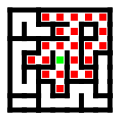

In [9]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
maze = Maze(7, 7, p_build=0.2, seed=8)
G = maze.maze_graph()

A = 24                    
visited = bfs(G, A)
num = len(visited)

print(f"Des de la cel·la {A} podem accedir a {num} caselles")
print(f"Ordre d'exploració: {visited}")
maze.set_values(visited, 1, color=(255,0,0))
maze.set_value(A, 1, color=(0,255,0))

maze.display_maze(plot_path=True, height=100)

Des de la cel·la 174 podem accedir a 175 caselles
Ordre d'exploració: [174, 173, 224, 223, 172, 274, 273, 122, 171, 275, 272, 123, 170, 222, 322, 73, 220, 120, 221, 323, 23, 74, 219, 119, 121, 271, 324, 22, 124, 24, 169, 269, 118, 71, 270, 325, 21, 125, 25, 319, 168, 70, 20, 75, 175, 26, 318, 320, 167, 218, 19, 76, 225, 27, 268, 321, 217, 18, 77, 126, 226, 267, 68, 17, 78, 176, 127, 266, 69, 16, 28, 128, 177, 216, 66, 29, 178, 129, 227, 215, 67, 65, 116, 30, 228, 79, 165, 117, 15, 166, 31, 14, 32, 13, 64, 33, 63, 114, 62, 115, 12, 11, 61, 60, 10, 9, 8, 58, 7, 59, 108, 6, 57, 109, 158, 5, 107, 159, 4, 106, 54, 3, 156, 53, 2, 157, 52, 207, 51, 208, 206, 1, 258, 205, 0, 308, 255, 155, 50, 309, 154, 100, 259, 104, 150, 209, 103, 105, 200, 102, 153, 55, 201, 152, 203, 56, 251, 151, 202, 253, 250, 101, 252, 300, 301, 302, 303, 304, 305, 254, 306, 204, 256, 257, 307]


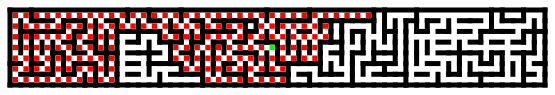

In [11]:
# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
maze = Maze(50, 7, p_build=0.2, seed=8)
G = maze.maze_graph()

A = 174                      
visited = bfs(G, A)
num = len(visited)

print(f"Des de la cel·la {A} podem accedir a {num} caselles")
print(f"Ordre d'exploració: {visited}")
maze.set_values(visited, 1, color=(255,0,0))
maze.set_value(A, 1, color=(0,255,0))

maze.display_maze(plot_path=True, height=75)

# Problema 2: Holes (2,5p)</h1>
 Implementeu una funció anomenada <b>holes()</b> que, donat un graf, un node orígen, un node destí, i un diccionari de nodes amb penalitzacions, trobi el camí més curt entre orígen i destí.<br>
    Si el camí passa per un dels nodes del diccionari, el cost de visitar el node serà la penalització en comptes de ser cost 1.<br>
    Heu de basar la vosta solució en l'algorisme <b>Dijkstra</b>.
</p>    
    
</div>

In [12]:
import heapq

def holes(G, origin, destination, holes_dct={}):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :holes_dct: Un diccionari del tipus {node: penalització}. Passar per cada node del diccionari té un cost diferent a 1.
    
    Returns
    =======
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' (ambdós inclosos).
    :cost: Un enter amb el cost de recórrer el camí, incloent-hi les penalitzacions.
    """
    path = []
    cost = 0
    anterior={} #Diccionari que guarda ('node*' : 'node per arribar a node* més rapid')
    anterior[origin] = None
    
    # Inicialitzem les distancies desde el node inicial a tots los altres nodes com infinit.
    distances = {node: float('inf') for node in G}
    distances[origin] = 0  # La distancia desde el node inicial a sí mateix es 0.
    
    #Creem una cua de prioritat (los mes petits sempre davant) per a gestionar los nodes a visitar.
    queue = [(0, origin)]  # Cada element de la cua es de la forma (Distancia que hi ha fins arribar a ell, node que és)
    
    while queue:
        # Sempre que canviem de node anem al que esta més prop en quant a distancia desde l'origen (és lo primer de la cua).
        (actual_distance, actual_node) = heapq.heappop(queue)
        
        # Si el node al que hem arribat és el node destí (lo node mes proper en quan a distancia del origen), HEM ACABAT.
        if actual_node == destination:
            cost = distances[destination]
            while actual_node is not None: 
                path.append(actual_node)
                actual_node = anterior[actual_node]
            return path[::-1], cost #path[-2::-1] si no tenim en conte l'inicial al contar (però no el dibuixarà)
        
        
        #   Si no és lo node destí, continuem amb l'algoritme mirant els veïns del node actual,
        # d'aquesta manera si el seu camí per arribar a ell es mes proper, s'actualitza.
        for neighbor in G.neighbors(actual_node):
            
            if neighbor in holes_dct:
                distance = actual_distance + holes_dct[neighbor]
            else:
                distance = actual_distance + 1
            
            if distance < distances[neighbor]:
                distances[neighbor] = distance # El valor de la distancia fins arribar a ell
                anterior[neighbor] = actual_node # El node mes proper a ell es en el que estem
                heapq.heappush(queue, (distance, neighbor))
                
    #   Si sortim del bucle (la cua) i no ha trobat resultat retornem cami buit perque no pinte camí i 
    #( -1 ) valor que marca error en el calcul.
    return [], -1

Cost total: 44
Longitud del camí: 45


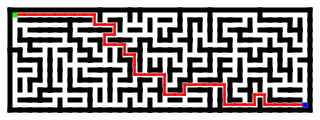

Cost total: 55
Longitud del camí: 55


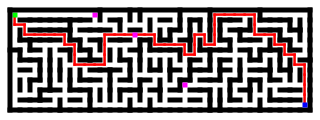

Cost total: 54
Longitud del camí: 47


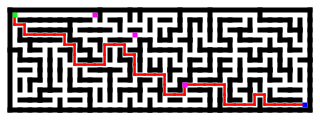

In [15]:
# Proveu el vostre algorisme!

maze = Maze(30, 10, seed=15)

# Obtenim el graph associat al laberint on cada node es una cel·la i tindrem una aresta si entre dues cel·les no existeix paret
G = maze.maze_graph()

A = 0
B = len(G.nodes)-1
color = (255, 0, 255)

h_dcts = [
    {}, # Sense penalització
    {8:20,72:2, 227:10},
    {8:15, 72:10, 227:9},
]
for holes_dct in h_dcts:
    maze.set_values(list(holes_dct.keys()), 1, color)
    path, cost = holes(G, A, B, holes_dct)

    maze.set_path(path)
    print(f"Cost total: {cost}")
    print('Longitud del camí:', len(path))
    maze.display_maze(plot_path=True, height=100)

    maze.set_values(list(holes_dct.keys()), 0, color)

# Problema 3: Checkpoint (2,5p)</h1>
 Implementeu una funció anomenada <b>checkpoint()</b> que, donat un graf, un node origen, un node destí i un node extra, trobi el camí més curt des del node origen fins el node destí passant pel node extra. Com en l'exercici anterior, tindrem un diccionari de punts on aplicarem una penalització.<br>
</p>    
    
</div>

<div class="alert alert-warning">
<p>
    <b>Quina és la complexitat d'aquest algorisme?</b><br>
</p>    

    
 ## COMPLEXITAT DEL DIJKSTRA = O( E ⋅ log(V ) )
 
   La complexitat de checkpoint() = complexitat de holes() -> en checkpoint es crida dos cops la funció holes()
    
    Complexitat de holes():
    
Primer que tot tenim el <b>while queue</b> que en el pitjor dels casos recorre tots el nodes, <b> O( V )</b><br>
Seguidament <b>for neighbor in G.neighbors(actual_node)</b> que en el pitjor cas (graf complet) té <b> O( E )</b><br>
Finalment dins d'aquest es fa l'operació <b> heappq.push</b> que té complexitat en el pitjor del cas <b> O( log(V) )</b><br>
    
Per tant la conclusió és:
    
    O((V + E) * log(V))

    
</div>

In [17]:
def checkpoint(G, origin, destination, extra, holes_dct={}):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extra: Índex d'un node extra per on ha de passar el camí
    :holes_dct: Un diccionari del tipus {node: penalització}. Passar per cada node del diccionari té un cost diferent a 1.
    
    Returns
    =======
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per 'extra'.
    :cost: Un enter amb el cost de recórrer el camí, incloent-hi les penalitzacions.
    """
    path = []
    cost = 0
    
    extra_path = []
    extra_cost = []
    
    # Cridem a la funció holes per trobar lo camí més rapid del origen al node extra
    path, cost = holes(G, origin, extra, holes_dct)
    
    # Si ha trobat resultat, que faigue lo mateix desde el extra al destí.
    if cost != -1:
        extra_path, extra_cost = holes(G, extra, destination, holes_dct)
        
        if extra_cost != -1:
            return path+extra_path[1:], cost+extra_cost # Resultat final és la suma dels returns de les dos crides
        
        else:
            return path, -1
    else:
        return [], -1  #Si no triba resultat retornem cami buit perque no pinte camí i ( -1 ) valor que marca error en el calcul.

El cost del camí més curt que passa per E és: 15
La distàcia del camí més curt que passa per E és: 16
El camí és: [30, 31, 32, 26, 20, 19, 13, 14, 8, 9, 10, 11, 17, 23, 29, 35]


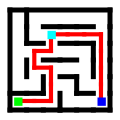

El cost del camí més curt que passa per E és: 17
La distàcia del camí més curt que passa per E és: 16
El camí és: [30, 31, 32, 26, 20, 19, 13, 14, 8, 9, 10, 11, 17, 23, 29, 35]


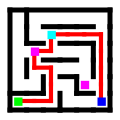

El cost del camí més curt que passa per E és: 17
La distàcia del camí més curt que passa per E és: 18
El camí és: [30, 31, 32, 26, 20, 21, 22, 16, 15, 14, 8, 9, 10, 11, 17, 23, 29, 35]


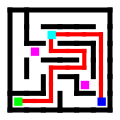

In [18]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(6,6, seed=17)
G = maze.maze_graph()

# Definim l'inici, el fi, un node extra i la llista amb penalització
A = 30
B = len(G.nodes)-1
E = 8

h_dcts = [
    {}, # Sense penalització
    {13:3, 28:5},
    {13:10, 28:20},
]
for holes_dct in h_dcts:
    # La funció set_value ens permet 'activar' un node per a que surti dibuixat al laberint.
    maze.set_value(E, 1)                         # Checkpoint
    maze.set_values(list(holes_dct.keys()), 1, (255,0,255))  # Penalitzacions

    path, cost = checkpoint(G, A, B, E, holes_dct)
    print(f'El cost del camí més curt que passa per E és: {cost}')
    print('La distàcia del camí més curt que passa per E és:', len(path))
    print(f'El camí és: {path}')
    maze.set_path(path)
    maze.display_maze(plot_path=True, height=100)
    
    maze.set_value(E, 0)                         # Checkpoint
    maze.set_values(list(holes_dct.keys()), 0, (255,0,255))  # Penalitzacions

# Problema 4: Checkpoints list (2,5p)</h1>
 Implementeu una funció anomenada <b>checkpoints_list()</b> que, donat un graf, un node origen, un node destí i una llista de nodes extres, trobi el camí més curt des del node origen fins el node destí passant per tots els nodes extra, en l'ordre més òptim. Com en l'exercici anterior, tindrem un diccionari de punts on aplicarem una penalització.<br>
    <b>Ajuda</b>: Podeu fer servir la funció <b>itertools.permutations</b>.
</p>    
    
</div>

<div class="alert alert-warning">
<p>
    <b>Quina és la complexitat d'aquest algorisme?</b><br>
</p>    

La complexitat del algoritme recau tota en les primeres linies de codi
    
    Complexitat de checkpoints_list():
    
Un cop començar a fer iteracions, allí la complexitat es constant <b>O( 1 )</b> perque l'únic que fa es accedir a la matriu per agafar el valor corresponent.
    
En les primeres linies de codi es crea una matriu d'orde (n+2)² on n és el nombre de nodes extra pel que ha d'intentar passar el camí.<br>
Cada posició de la matriu s'omple amb el resultat de la funció holes() del node de fila al node columna O((V + E) * log(V))<br>
Per tant tenim complexitat <b>O( (n+2)² * (V + E) * log(V) ) )</b><br>
    
Finalment es fan totes les permutacions possibles amb cost <b>O( n! )</b><br>
   
I seguidament ya tot el codi amb complexitat constant com ja hem explicat
    
Per tant, la conclusió es que la complexitat és <b>O( n! + (n+2)² * (V + E) * log(V) ) )</b><br>
    
    O(n!) ja que es molt gran al costat de l'altre producte

    
</div>

In [19]:
from itertools import permutations

def checkpoints_list(G, origin, destination, extras, holes_dct={}):
    """
    Params
    ======
    :G: Graf del qual en volem extreure el camí mínim. Ha de ser un objecte de la classe nx.Graph
    :origin: Índex del node orígen
    :destination: Índex del node destí
    :extras: Llista d'índexs de nodes per on ha de passar el camí.
    :holes_dct: Un diccionari del tipus {node: penalització}. Passar per cada node del diccionari té un cost diferent a 1.
    
    Returns
    =======
    :path: Una llista de nodes del camí més curt entre els nodes 'origin' i 'destination' que passa per tots els nodes 'extras'.
    :cost: Un enter amb el cost de recórrer el camí, incloent-hi les penalitzacions.
    """
    
    path = []
    cost = -1
    
        
    matriu = {}

    nodes_a_visitar = []
    nodes_a_visitar.append(origin)
    nodes_a_visitar = nodes_a_visitar + extras
    nodes_a_visitar.append(destination) #Es crea una llista amb tots els nodes pels que ha de passar si o si el camí

    #   Aquesta llista dona valors als indexs de les columnes i files de la matriu del resultat de cridar la funció holes()
    # amb holes() node origen el de la fila i node destí el de la columna  (la diagonal seràn valors de costs 0`s)
    for fila in nodes_a_visitar:
        matriu[fila] = {}
        for columna in nodes_a_visitar:
            x,y = holes(G, fila, columna, holes_dct)
            matriu[fila][columna] = {'path': x, 'cost': y}

    
    aux_path = []
    aux_cost = []
    
    #   Creem una lista de llistes on cadascuna és una de les permutacions possibles dels nodes extra pels que hem de passsar.
    extras_permuted = list(permutations(extras)) 
    
    #   En les següents linies comprovarem quina de totes les permutacions possibles dels nodes extra conté l'ordre més eficient 
    # del camí més rapid del origen al final passant per tots ells.
    for nodes in extras_permuted:
        extra_path = []
        extra_cost = 0
        
        #   Es fa el mateix procediment entre dos nodes sempre, però primer ho fem del origen al 1r node de llista d'extres.
        # Accedim al valor de la matriu que ha calculat la funció holes() entre aquests dos
        result = matriu[origin][nodes[0]]
        aux_path = result['path']
        aux_cost = result['cost']
        if aux_cost > 0:
                extra_path = aux_path
                extra_cost = aux_cost
        
        # Seguim l'ordre de la llista d'extres agafant l'actual amb el posterior, accedint a la matriu per veure valor ja calculat
        for i in range(len(nodes)-1):
            if aux_cost > 0:
                result = matriu[nodes[i]][nodes[i+1]]
                aux_path = result['path']
                aux_cost = result['cost']
                if aux_cost > 0:
                    extra_path = extra_path + aux_path[1:]
                    extra_cost = extra_cost + aux_cost
        
        if aux_cost > 0:
            result = matriu[nodes[len(nodes)-1]][destination]
            aux_path = result['path']
            aux_cost = result['cost'] #Finalment fem el mateix però del ultim node d'extres al destí
            if aux_cost > 0:
                    extra_path = extra_path + aux_path[1:]
                    extra_cost = extra_cost + aux_cost
                
                #   En cada canvi de nodes es mira si cost es diferent de -1, es un valor que s'ha imposat de retorn per si
                # no hi ha hagut resultat entre aquells dos nodes.
                # SI EN ALGUN MOMENT ES RETORNA -1, ja no segueix accedint a la matriu fins la següent variació.
                # Aquell ordre d'extres no seria valid.
                
        if cost == -1 or extra_cost < cost: # Finalment comprova si el nou cami total calculat es menor que el que havia.
            path = extra_path
            cost = extra_cost # si es així s'actualitza la nova millor solució trobada
                                    
    return path, cost

El cost del camí més curt que passa per E és: 74
La distàcia del camí més curt que passa per E és: 75


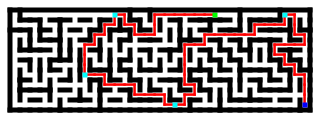

El cost del camí més curt que passa per E és: 144
La distàcia del camí més curt que passa per E és: 87


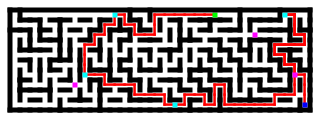

El cost del camí més curt que passa per E és: 112
La distàcia del camí més curt que passa per E és: 109


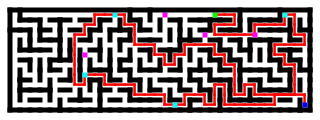

In [21]:
# Proveu el vostre algorisme!

# Creem un laberint i n'extraiem el graph
maze = Maze(30, 10, seed=25)
G = maze.maze_graph()

# Definim l'inici, el fi i node extres
A = 20
B = len(G.nodes)-1
E = [10,187, 286, 27]

h_dcts = [
    {}, # Sense penalització
    {216:200, 208:30, 84:50},
    {79:500, 127:100, 84:5, 15: 500}
]
for holes_dct in h_dcts:
    # La funció set_values ens permet 'activar' nodes per a que surtin dibuixat al laberint.
    maze.set_values(E, 1)                        # Checkpoint
    maze.set_values(list(holes_dct.keys()), 1, (255,0,255))  # Penalitzacions

    path, cost = checkpoints_list(G, A, B, E, holes_dct)
    print(f'El cost del camí més curt que passa per E és: {cost}')
    print('La distàcia del camí més curt que passa per E és:', len(path))
    maze.set_path(path)
    maze.display_maze(plot_path=True, height=100)

    # De la mateixa forma la funció set_values també ens permet 'desactivar' els nodes.
    maze.set_values(E, 0)
    maze.set_values(list(holes_dct.keys()), 0, (255,0,255))

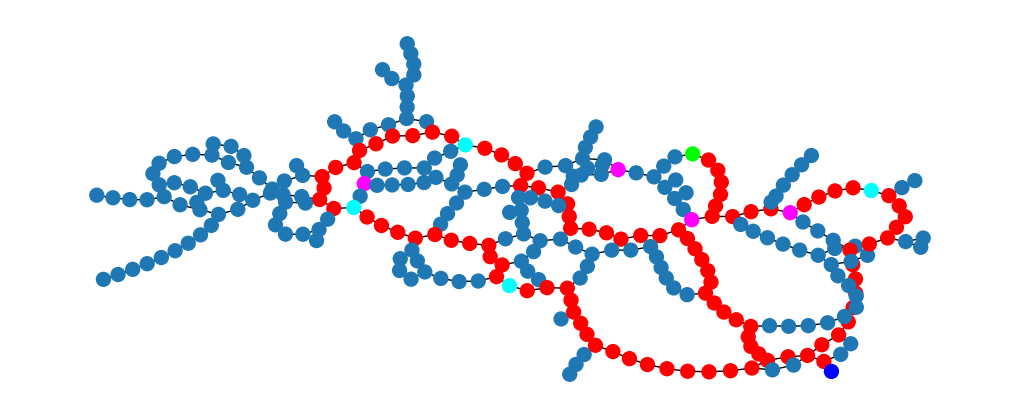

In [22]:
plt.figure(figsize=(10,4))

colorA, colorB, colorE, colorP, colorPTH, colorDEF = '#00ff00', '#0000ff', '#00ffff', '#ff00ff', '#ff0000', '#1f78b4'
color_map = [colorA if n==A else colorB if n==B else colorE if n in E else colorP if n in holes_dct else colorPTH if n in path else colorDEF for n in G.nodes]

pos = nx.kamada_kawai_layout(G).items()

pos = {k: v[::-1] for k,v in pos}

# Dibuixem el graf definint la posició, el color i la mida de cada node.
nx.draw(G, pos=pos, node_color=color_map, node_size=100)